In [2]:
# Nguyen Hai Duong
# nhduong_3010@live.com
# Chonnam National University
# 2018.04.15

# Overview
- FER2013 dataset (face images + facial expression)
  + Goal: classifying facial exprression
  + Input: a 48x48 image
  + Output: facial expression (angry, disgust, fear, happy, neutral, sad, and surprise)
- Defining an CNN+MLP
- Training and evaluating an CNN+MLP

# Import libraries

In [2]:
import keras
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import time
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
num_classes = 7   # angry, disgust, fear, happy, neutral, sad, and surprise

# (1) Data

### Download data at https://drive.google.com/open?id=0BxINLo5jshCRbXpRcnl2SjJkdlk
This source code and npy files MUST be in the same location

In [4]:
trainingset = np.loadtxt('fer2013_training_onehot.csv', delimiter=',')
testingset = np.loadtxt('fer2013_publictest_onehot.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

In [5]:
n_inputs = 2304
n_classes = 7
img_dim = 48

x_training = trainingset[:, 0:n_inputs]
y_training = trainingset[:, n_inputs:n_inputs + n_classes]

x_testing = testingset[:, 0:n_inputs]
y_testing = testingset[:, n_inputs:n_inputs + n_classes]

x_training = x_training.reshape(x_training.shape[0], 48, 48)
x_training = np.expand_dims(x_training, axis=4)

x_testing = x_testing.reshape(x_testing.shape[0], 48, 48)
x_testing = np.expand_dims(x_testing, axis=4)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.


# (2) Declare model

In [6]:
# 64x64 portray image
input_image = Input(shape=(48, 48, 1), name='Input')

# conv, pooling layers + dropout
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='conv1_1')(input_image)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu', name='conv1_2')(x)
x = MaxPooling2D(pool_size=(2, 2), name='pool1')(x)
x = Dropout(rate=0.25, name='conv_dropout1')(x)

x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', name='conv2_1')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='valid', activation='relu', name='conv2_2')(x)
x = Conv2D(filters=218, kernel_size=(3, 3), padding='same', activation='relu', name='conv2_3')(x)
x = Conv2D(filters=218, kernel_size=(3, 3), padding='valid', activation='relu', name='conv2_4')(x)
x = MaxPooling2D(pool_size=(2, 2), name='pool2')(x)
x = Dropout(rate=0.25, name='conv_dropout2')(x)

# similar to the MLP example!
# matrix ---> vector
x = Flatten(name='flatten')(x)

# FC layers + dropout
x = Dense(units=1024, activation='relu', name='fc1')(x)
x = Dropout(rate=0.5, name='fc_dropout1')(x)

output_label = Dense(units=num_classes, activation='softmax', name='fc3_7ways_softmax')(x)

# define model
model = Model(inputs=input_image, outputs=output_label, name='emo_cnn')

# print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 48, 48, 1)         0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 48, 48, 64)        640       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 46, 46, 64)        36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv_dropout1 (Dropout)      (None, 23, 23, 64)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 21, 21, 128)       147584    
__________

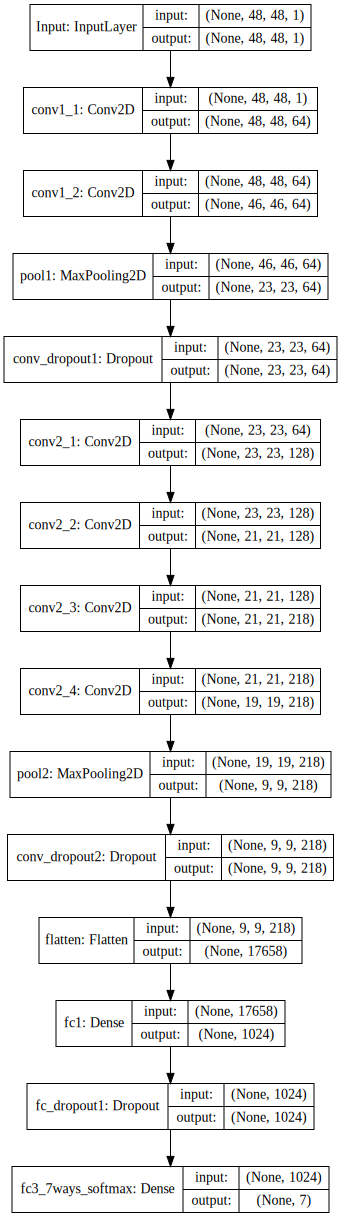

In [7]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# (3) Train defined model
- Note that the training history including loss and accuracy will be save in 'history' variable
- In case your system runs out of memory (OOM), try to decrease batch size

In [13]:
# declare learning rate, loss function, and model metric
loss = 'categorical_crossentropy'
lr = 0.0001
model.compile(loss=loss, optimizer=Adam(lr=lr), metrics=['accuracy'])

# train the model
batch_size = 128
epochs = 15

starting_time = time.time()
history = model.fit(x_training, y_training,
                    validation_data=(x_testing, y_testing),
                    batch_size=batch_size,
                    epochs=epochs)
print('> training time is %.4f minutes' % ((time.time() - starting_time)/60))

Train on 28709 samples, validate on 3589 samples
Epoch 1/15
28709/28709 [==============================] - 25s 879us/step - loss: 2.5310 - acc: 0.2356 - val_loss: 1.7838 - val_acc: 0.2906
Epoch 2/15
28709/28709 [==============================] - 24s 845us/step - loss: 1.6690 - acc: 0.3420 - val_loss: 1.5198 - val_acc: 0.4199
Epoch 3/15
28709/28709 [==============================] - 24s 846us/step - loss: 1.5103 - acc: 0.4232 - val_loss: 1.3997 - val_acc: 0.4759
Epoch 4/15
28709/28709 [==============================] - 24s 847us/step - loss: 1.3836 - acc: 0.4764 - val_loss: 1.2972 - val_acc: 0.5138
Epoch 5/15
28709/28709 [==============================] - 25s 859us/step - loss: 1.2858 - acc: 0.5152 - val_loss: 1.2344 - val_acc: 0.5369
Epoch 6/15
28709/28709 [==============================] - 24s 849us/step - loss: 1.2069 - acc: 0.5493 - val_loss: 1.2041 - val_acc: 0.5464
Epoch 7/15
28709/28709 [==============================] - 24s 847us/step - loss: 1.1204 - acc: 0.5831 - val_loss: 1.1

### Training time
- Training time with GTX 1080 is about 6.1120 minutes for 15 epochs
- Training time with Core i7 is around 302.6 minutes (~5.04 hours) for 15 epochs

# (4) Evaluate trained model

In [14]:
score = model.evaluate(x_testing, y_testing)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3589/3589 [==============================] - 1s 351us/step
Test loss: 1.4070247079908234
Test accuracy: 0.5954304820325721


In [22]:
def get_emotion(ohv):
    indx = np.argmax(ohv)
        
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

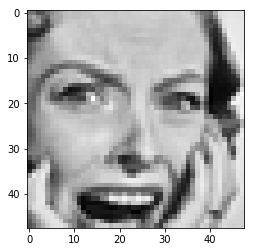

> testing image index: 2783
> true emotion: fear
> predicted emotion: fear


In [26]:
# 2163
img_indx = np.uint32(np.random.rand()*(testingset.shape[0] - 1))
sample = x_testing[img_indx, :]
sample = sample.reshape(48, 48)

pred_cls = model.predict(sample.reshape(1, 48, 48, 1))

plt.imshow(sample, cmap='gray')
plt.show()
print('> testing image index: %d\n> true emotion: %s\n> predicted emotion: %s' % (img_indx, get_emotion(y_testing[img_indx, :]), get_emotion(pred_cls)))